In [58]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [59]:
#loading the dataset
df1 = pd.read_csv('/content/2021_data.csv')

<ipython-input-59-f4f311b0f0f2>:2: DtypeWarning: Columns (0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/2021_data.csv')


In [60]:
# Remove the first row
df1 = df1.iloc[1:]

In [61]:
# Convert specific columns to numeric values
columns_to_convert = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
df1[columns_to_convert] = df1[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# Alternatively, convert all object columns to numeric values
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [62]:
# Extract rows where mm=0
df1 = df1[df1["mm"] == 40]

In [63]:
#here we reset the index
df1 = df1.reset_index(drop=True)

In [64]:
df1.shape

(6701, 18)

In [65]:
#loading the dataset
df3 = pd.read_csv('/content/2022_data.csv')

<ipython-input-65-27a150a992fd>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/2022_data.csv')


In [66]:
# Remove the first row
df3 = df3.iloc[1:]

In [67]:
# Convert specific columns to numeric values
columns_to_convert = ['#YY', 'MM', 'DD', 'hh', 'mm', 'WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'MWD', 'PRES', 'ATMP', 'WTMP', 'DEWP', 'VIS', 'TIDE']
df3[columns_to_convert] = df3[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# Alternatively, convert all object columns to numeric values
df3 = df3.apply(pd.to_numeric, errors='coerce')

In [68]:
# Extract rows where mm=0
df3 = df3[df3["mm"] == 40]

In [69]:
#here we reset the index
df3 = df3.reset_index(drop=True)

In [70]:
df3.shape

(8747, 18)

In [71]:
# Concatenate the dataframes vertically
df = pd.concat([df1, df3], ignore_index=True)

In [72]:
df.head()

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2021,1,1,0,40,82.0,6.7,9.8,3.77,13.79,9.22,312,1021.6,24.3,25.0,21.2,99,99
1,2021,1,1,1,40,64.0,6.6,8.2,4.41,16.00,9.96,329,1021.7,24.3,25.0,21.7,99,99
2,2021,1,1,2,40,68.0,6.6,8.5,4.48,16.00,10.64,321,1022.1,24.6,25.0,21.0,99,99
3,2021,1,1,3,40,65.0,7.0,9.0,4.10,16.00,9.72,318,1022.5,24.5,25.0,21.0,99,99
4,2021,1,1,4,40,62.0,7.0,9.3,3.94,14.81,9.30,327,1022.9,24.6,25.0,20.9,99,99


In [73]:
df.shape

(15448, 18)

In [74]:
df.dtypes

#YY       int64
MM        int64
DD        int64
hh        int64
mm        int64
WDIR    float64
WSPD    float64
GST     float64
WVHT    float64
DPD     float64
APD     float64
MWD       int64
PRES    float64
ATMP    float64
WTMP    float64
DEWP    float64
VIS       int64
TIDE      int64
dtype: object

In [75]:
df.isnull().sum()

#YY        0
MM         0
DD         0
hh         0
mm         0
WDIR     866
WSPD    2532
GST        0
WVHT       0
DPD        0
APD        0
MWD        0
PRES       0
ATMP       0
WTMP       0
DEWP       0
VIS        0
TIDE       0
dtype: int64

In [76]:
df = df.dropna()

In [77]:
df.shape

(12916, 18)

In [78]:
df.isnull().sum()

#YY     0
MM      0
DD      0
hh      0
mm      0
WDIR    0
WSPD    0
GST     0
WVHT    0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
VIS     0
TIDE    0
dtype: int64

In [79]:
#importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [80]:
# Assuming you have a DataFrame called 'df'
selected_columns = ['WVHT']  # Specify the columns you want to select

data = df[selected_columns]  # Create a new DataFrame by selecting the specified columns

# Print the new DataFrame
print(data)

       WVHT
0      3.77
1      4.41
2      4.48
3      4.10
4      3.94
...     ...
15443  2.16
15444  2.19
15445  2.30
15446  2.54
15447  2.27

[12916 rows x 1 columns]


In [81]:
unique_values = data['WVHT'].unique()
unique_values

array([ 3.77,  4.41,  4.48,  4.1 ,  3.94,  4.29,  3.63,  3.53,  3.09,
        3.54,  3.46,  3.45,  3.33,  3.07,  3.19,  3.26,  2.92,  2.64,
        2.61,  2.65,  2.56,  2.82,  2.49,  2.54,  2.69,  2.67,  2.35,
        2.27,  2.12,  2.33,  2.21,  2.15,  2.08,  2.24,  2.  ,  1.97,
        1.87,  1.98,  2.04,  1.89,  1.95,  1.88,  2.06,  1.85, 99.  ,
        2.16,  2.13,  2.3 ,  2.53,  2.18,  2.89,  2.51,  2.74,  2.77,
        2.63,  2.83,  2.62,  2.71,  2.88,  2.68,  2.58,  3.1 ,  3.05,
        3.02,  3.06,  3.57,  3.43,  3.14,  2.7 ,  3.01,  2.55,  2.96,
        2.75,  2.45,  2.47,  2.31,  2.57,  2.52,  2.5 ,  2.59,  2.36,
        2.46,  2.79,  2.84,  3.42,  3.74,  3.32,  3.72,  3.84,  4.07,
        3.81,  3.69,  3.7 ,  3.17,  3.25,  3.4 ,  3.35,  3.65,  3.68,
        3.9 ,  4.2 ,  4.19,  3.37,  3.79,  3.29,  3.08,  3.28,  2.87,
        3.15,  2.9 ,  2.72,  3.11,  2.48,  2.1 ,  2.43,  2.29,  2.23,
        2.26,  2.2 ,  2.19,  2.11,  2.4 ,  2.25,  2.17,  2.38,  3.21,
        3.18,  3.24,

In [82]:
data = data[data['WVHT'] != 99]

In [83]:
data.head()

,WVHT
0,3.77
1,4.41
2,4.48
3,4.10
4,3.94


In [84]:
data.shape

(12678, 1)

<Axes: >

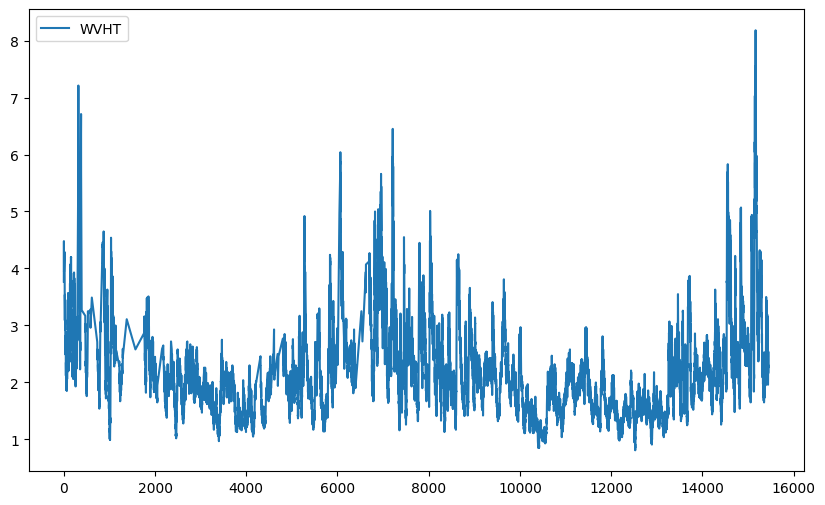

In [85]:
data.plot(figsize=(10,6))

In [86]:
# Select the specific column you want to focus on (e.g., "WVHT" - significant wave height)
target_col = "WVHT"
data = data[[target_col]].values

In [87]:
# Define the number of previous time steps to consider for prediction
time_steps = 100

In [88]:
# Prepare the data in a suitable format for LSTM
X = []
y = []
for i in range(time_steps, len(data)):
    X.append(data[i - time_steps:i, 0])
    y.append(data[i, 0])
X = np.array(X)
y = np.array(y)

In [89]:
print(X)

[[3.77 4.41 4.48 ... 2.71 2.64 3.01]
 [4.41 4.48 4.1  ... 2.64 3.01 2.54]
 [4.48 4.1  3.94 ... 3.01 2.54 2.5 ]
 ...
 [1.68 1.88 1.88 ... 2.31 2.16 2.19]
 [1.88 1.88 1.86 ... 2.16 2.19 2.3 ]
 [1.88 1.86 1.73 ... 2.19 2.3  2.54]]


In [90]:
print(y)

[2.54 2.5  2.67 ... 2.3  2.54 2.27]


In [91]:
# Split the data into training, validation, and testing sets (70% training, 20% validation, 10% testing)
train_split = 0.7
val_split = 0.2
train_index = int(train_split * len(X))
val_index = int((train_split + val_split) * len(X))

In [92]:
train_X, train_y = X[:train_index], y[:train_index]
val_X, val_y = X[train_index:val_index], y[train_index:val_index]
test_X, test_y = X[val_index:], y[val_index:]

In [93]:
# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
val_X = np.reshape(val_X, (val_X.shape[0], val_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [94]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)
print(val_X.shape)
print(val_y.shape)

(8804, 100, 1)
(8804,)
(1258, 100, 1)
(1258,)
(2516, 100, 1)
(2516,)


In [95]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Assuming train_X has the appropriate shape (samples, timesteps, features)
# Create the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True,input_shape=(time_steps, 1)))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True,input_shape=(time_steps, 1)))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True,input_shape=(time_steps, 1)))
model.add(Dropout(0.6))
model.add(LSTM(16, return_sequences=False,input_shape=(time_steps, 1)))
model.add(Dropout(0.8))
model.add(Dense(1))
model.summary()
model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.01))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 128)          66560     
                                                                 
 dropout_4 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_5 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 32)           12416     
                                                                 
 dropout_6 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_7 (LSTM)               (None, 16)               

In [96]:
#Train the LSTM model with early stopping based on validation loss
#from tensorflow.keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(patience=600, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=50, batch_size=512, validation_data=(val_X, val_y), verbose=1)

Epoch 1/50
18/18 [==============================] - 41s 2s/step - loss: 2.0011 - val_loss: 0.2624
Epoch 2/50
18/18 [==============================] - 33s 2s/step - loss: 1.3802 - val_loss: 0.2537
Epoch 3/50
18/18 [==============================] - 30s 2s/step - loss: 1.2628 - val_loss: 0.2541
Epoch 4/50
18/18 [==============================] - 31s 2s/step - loss: 1.1520 - val_loss: 0.2621
Epoch 5/50
18/18 [==============================] - 30s 2s/step - loss: 1.0838 - val_loss: 0.2622
Epoch 6/50
18/18 [==============================] - 31s 2s/step - loss: 1.0119 - val_loss: 0.2741
Epoch 7/50
18/18 [==============================] - 31s 2s/step - loss: 0.9303 - val_loss: 0.2754
Epoch 8/50
18/18 [==============================] - 30s 2s/step - loss: 0.8694 - val_loss: 0.2808
Epoch 9/50
18/18 [==============================] - 31s 2s/step - loss: 0.7946 - val_loss: 0.2463
Epoch 10/50
18/18 [==============================] - 31s 2s/step - loss: 0.7004 - val_loss: 0.0943
Epoch 11/50
18/18 [

In [97]:
# Get the loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']

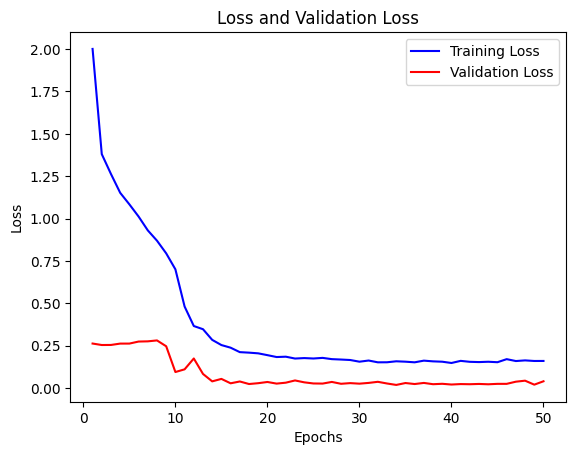

In [98]:
# Plot the loss and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [99]:
# Make predictions
train_preds = model.predict(train_X)
val_preds = model.predict(val_X)
test_preds = model.predict(test_X)

40/40 [==============================] - 3s 76ms/step


In [100]:
# Calculate RMSE (Root Mean Squared Error) for training, validation, and testing predictions
train_rmse = np.sqrt(mean_squared_error(train_y, train_preds[:, 0]))
val_rmse = np.sqrt(mean_squared_error(val_y, val_preds[:, 0]))
test_rmse = np.sqrt(mean_squared_error(test_y, test_preds[:, 0]))
print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.2541672448833793
Validation RMSE: 0.19925435687651183
Test RMSE: 0.4201604396339945


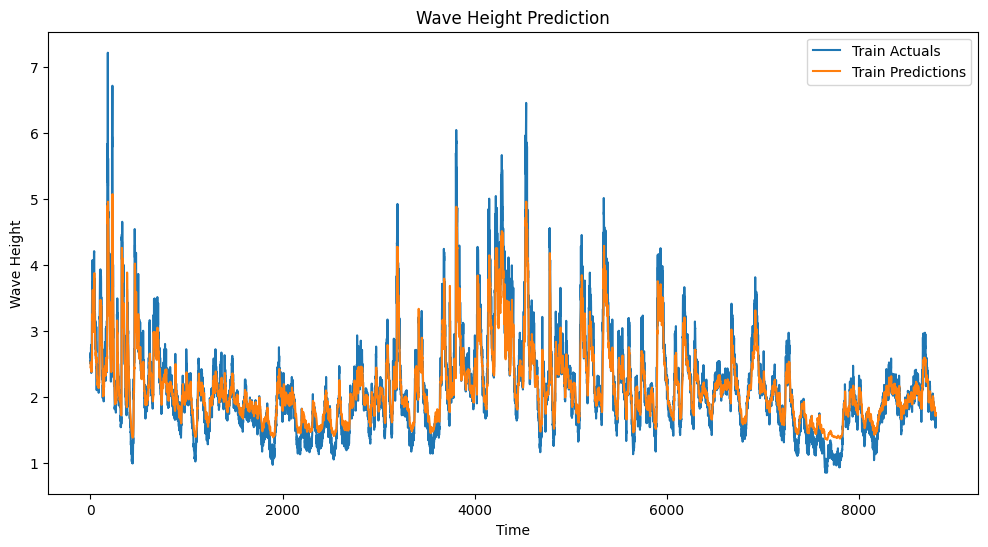

In [101]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_y, label="Train Actuals")
plt.plot(train_preds[:, 0], label="Train Predictions")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.show()

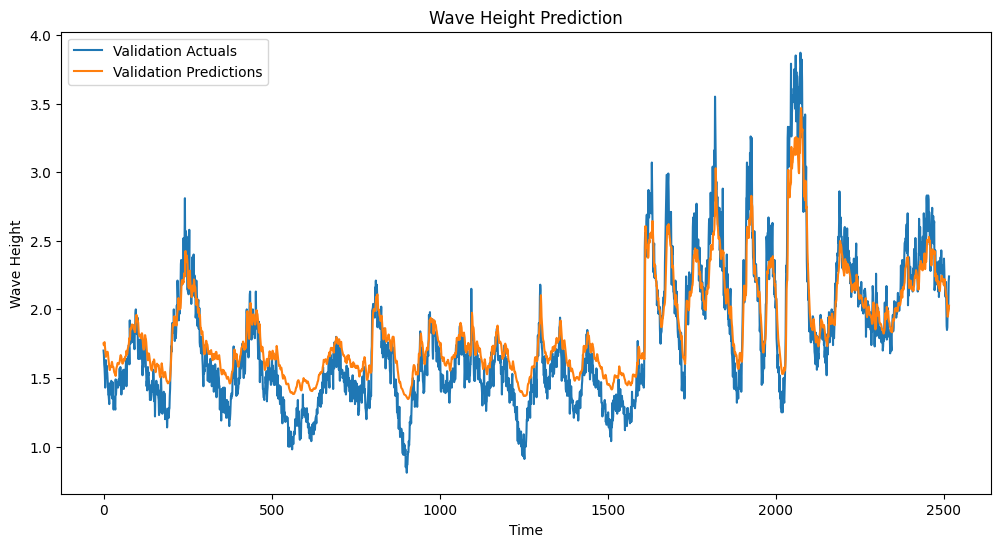

In [102]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(val_y, label="Validation Actuals")
plt.plot(val_preds[:, 0], label="Validation Predictions")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.show()

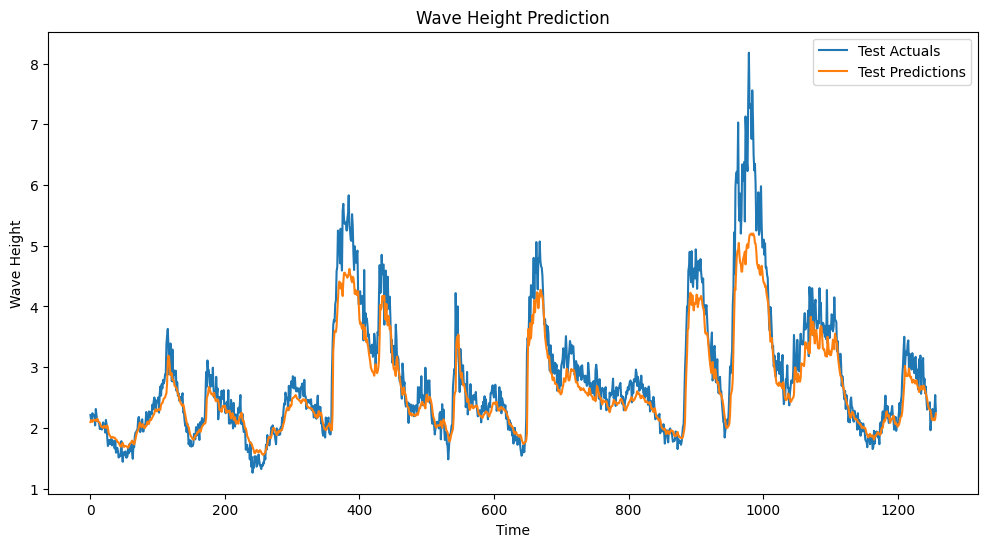

In [103]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_y, label="Test Actuals")
plt.plot(test_preds[:, 0], label="Test Predictions")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Wave Height")
plt.title("Wave Height Prediction")
plt.show()

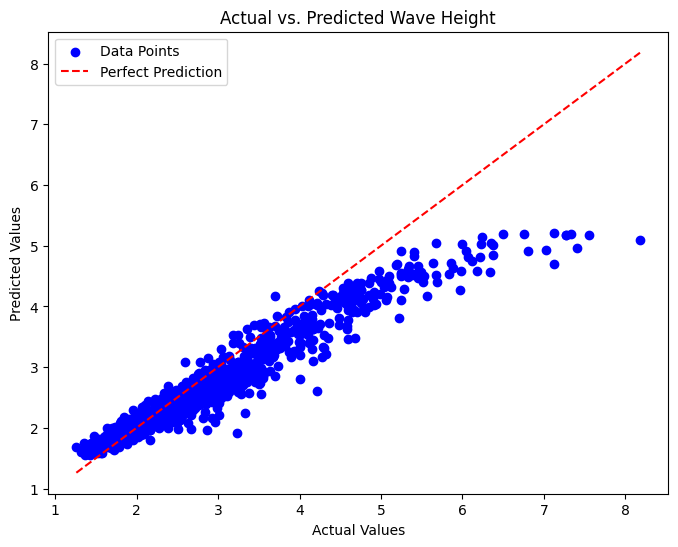

In [104]:
import matplotlib.pyplot as plt

# Assuming you have the actual values in 'test_y' and predicted values in 'test_preds'
# Replace these placeholders with your actual data

plt.figure(figsize=(8, 6))
plt.scatter(test_y, test_preds[:, 0], color='blue', label='Data Points')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Wave Height')
plt.legend()
plt.show()

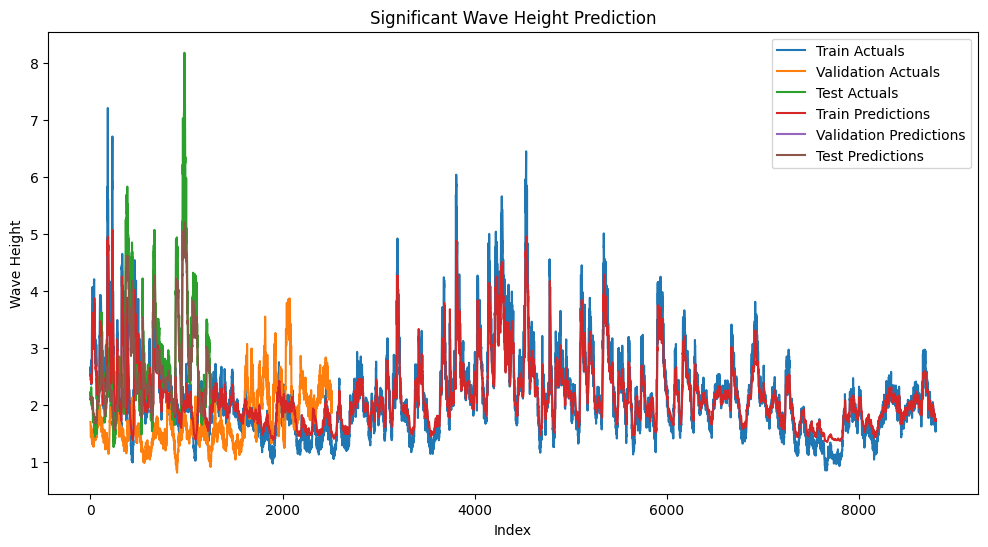

In [105]:
# Plot the actual values vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_y, label="Train Actuals")
plt.plot(val_y, label="Validation Actuals")
plt.plot(test_y, label="Test Actuals")
plt.plot(train_preds[:, 0], label="Train Predictions")
plt.plot(val_preds[0], label="Validation Predictions")
plt.plot(test_preds[:, 0], label="Test Predictions")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Wave Height")
plt.title("Significant Wave Height Prediction")
plt.show()

In [106]:
# Calculate MSE, RMSE, MSPE, NMSE, R-squared, and MAE
train_mse = mean_squared_error(train_y, train_preds[:, 0])
val_mse = mean_squared_error(val_y, val_preds[:, 0])
test_mse = mean_squared_error(test_y, test_preds[:, 0])
# Print the evaluation metrics
print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Test MSE:", test_mse)

Train MSE: 0.0646009883716077
Validation MSE: 0.039702298734272334
Test MSE: 0.17653479503343156


In [107]:
train_mspe = np.mean(np.square((train_y - train_preds[:, 0]) / train_y)) * 100
val_mspe = np.mean(np.square((val_y - val_preds[:, 0]) / val_y)) * 100
test_mspe = np.mean(np.square((test_y - test_preds[:, 0]) / test_y)) * 100
print("Train MSPE:", train_mspe)
print("Validation MSPE:", val_mspe)
print("Test MSPE:", test_mspe)

Train MSPE: 1.3508370825565355
Validation MSPE: 1.7901671947065636
Test MSPE: 1.0927384677870442


In [108]:
train_nmse = train_mse / np.var(train_y)
val_nmse = val_mse / np.var(val_y)
test_nmse = test_mse / np.var(test_y)
print("Train NMSE:", train_nmse)
print("Validation NMSE:", val_nmse)
print("Test NMSE:", test_nmse)

Train NMSE: 0.11783081675846958
Validation NMSE: 0.15669677836009122
Test NMSE: 0.15667163597493047


In [109]:
train_mape = np.mean(np.abs((train_y - train_preds[:, 0]) / train_y)) * 100
val_mape = np.mean(np.abs((val_y - val_preds[:, 0]) / val_y)) * 100
test_mape = np.mean(np.abs((test_y - test_preds[:, 0]) / test_y)) * 100
print("Train MAPE:", train_mape)
print("Validation MAPE:", val_mape)
print("Test MAPE:", test_mape)

Train MAPE: 8.733120227604942
Validation MAPE: 10.438009937777688
Test MAPE: 8.254229749095728


In [110]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

In [111]:
train_mae = mean_absolute_error(train_y, train_preds[:, 0])
val_mae = mean_absolute_error(val_y, val_preds[:, 0])
test_mae = mean_absolute_error(test_y, test_preds[:, 0])
print("Train MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Test MAE:", test_mae)

Train MAE: 0.17951594348876707
Validation MAE: 0.16452288010162083
Test MAE: 0.26903653736902916


In [112]:
train_r2 = r2_score(train_y, train_preds[:, 0])
val_r2 = r2_score(val_y, val_preds[:, 0])
test_r2 = r2_score(test_y, test_preds[:, 0])
print("Train R-squared:", train_r2)
print("Validation R-squared:", val_r2)
print("Test R-squared:", test_r2)

Train R-squared: 0.8821691832415304
Validation R-squared: 0.8433032216399088
Test R-squared: 0.8433283640250695


In [113]:
# Start measuring training time
start_time = time.time()
print(start_time)
# End measuring training time
end_time = time.time()
print(end_time)
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

1692623244.9681487
1692623244.9702733
Training Time: 0.0021245479583740234 seconds
